<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/Future_Risk_prediction/DSGP_WIth_K_Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [120]:

from sklearn.model_selection import train_test_split#mmount google drive with colab
drive.mount('/content/drive')

#loading the Dataset

df = pd.read_excel('/content/drive/MyDrive/DSGP/IMPORT STATISTICS - 2023.xlsx')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
# Displaying the dataset

df.head()

,IMPORTER,YEAR,MONTH,HSCODE,COUNTRY,UNIT,QUANTITY,VALUE_RS,DESCRIPTION_01,DESCRIPTION_02,DESCRIPTION_03
0,Unknown,2023.0,JANUARY,280110,BANGLADESH,Kg.,131600.0,13877114.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
1,Unknown,2023.0,JANUARY,280110,INDIA,Kg.,37800.0,3924989.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
2,Unknown,2023.0,JANUARY,280110,MALAYSIA,Kg.,12090.0,5390772.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
3,Unknown,2023.0,FEBRUARY,280110,BANGLADESH,Kg.,25200.0,3089445.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
4,Unknown,2023.0,FEBRUARY,280110,INDIA,Kg.,75599.0,6939860.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine


In [122]:
#displaying the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMPORTER        1042 non-null   object 
 1   YEAR            292 non-null    float64
 2   MONTH           292 non-null    object 
 3   HSCODE          1042 non-null   int64  
 4   COUNTRY         1038 non-null   object 
 5   UNIT            1042 non-null   object 
 6   QUANTITY        1039 non-null   float64
 7   VALUE_RS        292 non-null    float64
 8   DESCRIPTION_01  1042 non-null   object 
 9   DESCRIPTION_02  1042 non-null   object 
 10  DESCRIPTION_03  1042 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 89.7+ KB


In [123]:
#Displaying the statistical summary of dataset
df.describe()

,YEAR,HSCODE,QUANTITY,VALUE_RS
count,292.000000,1.042000e+03,1.039000e+03,2.920000e+02
mean,2018.684932,9.093611e+08,4.241679e+04,3.693244e+06
std,3.409615,1.326227e+09,2.352492e+05,7.946637e+06
min,2016.000000,2.801100e+05,0.000000e+00,0.000000e+00
25%,2016.000000,2.808000e+07,3.500000e+01,1.900250e+01
50%,2016.000000,2.829110e+07,1.000000e+03,1.658700e+02
75%,2023.000000,2.801200e+09,1.989000e+04,4.316572e+06
max,2023.000000,3.102909e+09,4.000000e+06,4.727172e+07


In [124]:
# Identifying categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Displaying the Categorical and the Numerical columns'
print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
Index(['IMPORTER', 'MONTH', 'COUNTRY', 'UNIT', 'DESCRIPTION_01',
       'DESCRIPTION_02', 'DESCRIPTION_03'],
      dtype='object')

Numerical Columns:
Index(['YEAR', 'HSCODE', 'QUANTITY', 'VALUE_RS'], dtype='object')


In [125]:
# Converting 'IMPORTER' and 'HSCODE' columns to string type
df['HSCODE'] = df['HSCODE'].astype(str)
df['IMPORTER'] = df['IMPORTER'].astype(str)

# Displaying the HSCODE column data type
print("Data Type of HSCODE Columns:")
print(df[['HSCODE']].dtypes)

print("Data Type of IMPORTER Columns:")
print(df[['IMPORTER']].dtypes)

Data Type of HSCODE Columns:
HSCODE    object
dtype: object
Data Type of IMPORTER Columns:
IMPORTER    object
dtype: object


In [126]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Displaying the categorical features
print("Categorical Features:")
for feature in categorical_cols:
    print(f"- {feature}")

# Display data type of the columns
print("\nData Type of Categorical Features:")
print(df[categorical_cols].dtypes)

Categorical Features:
- IMPORTER
- MONTH
- HSCODE
- COUNTRY
- UNIT
- DESCRIPTION_01
- DESCRIPTION_02
- DESCRIPTION_03

Data Type of Categorical Features:
IMPORTER          object
MONTH             object
HSCODE            object
COUNTRY           object
UNIT              object
DESCRIPTION_01    object
DESCRIPTION_02    object
DESCRIPTION_03    object
dtype: object


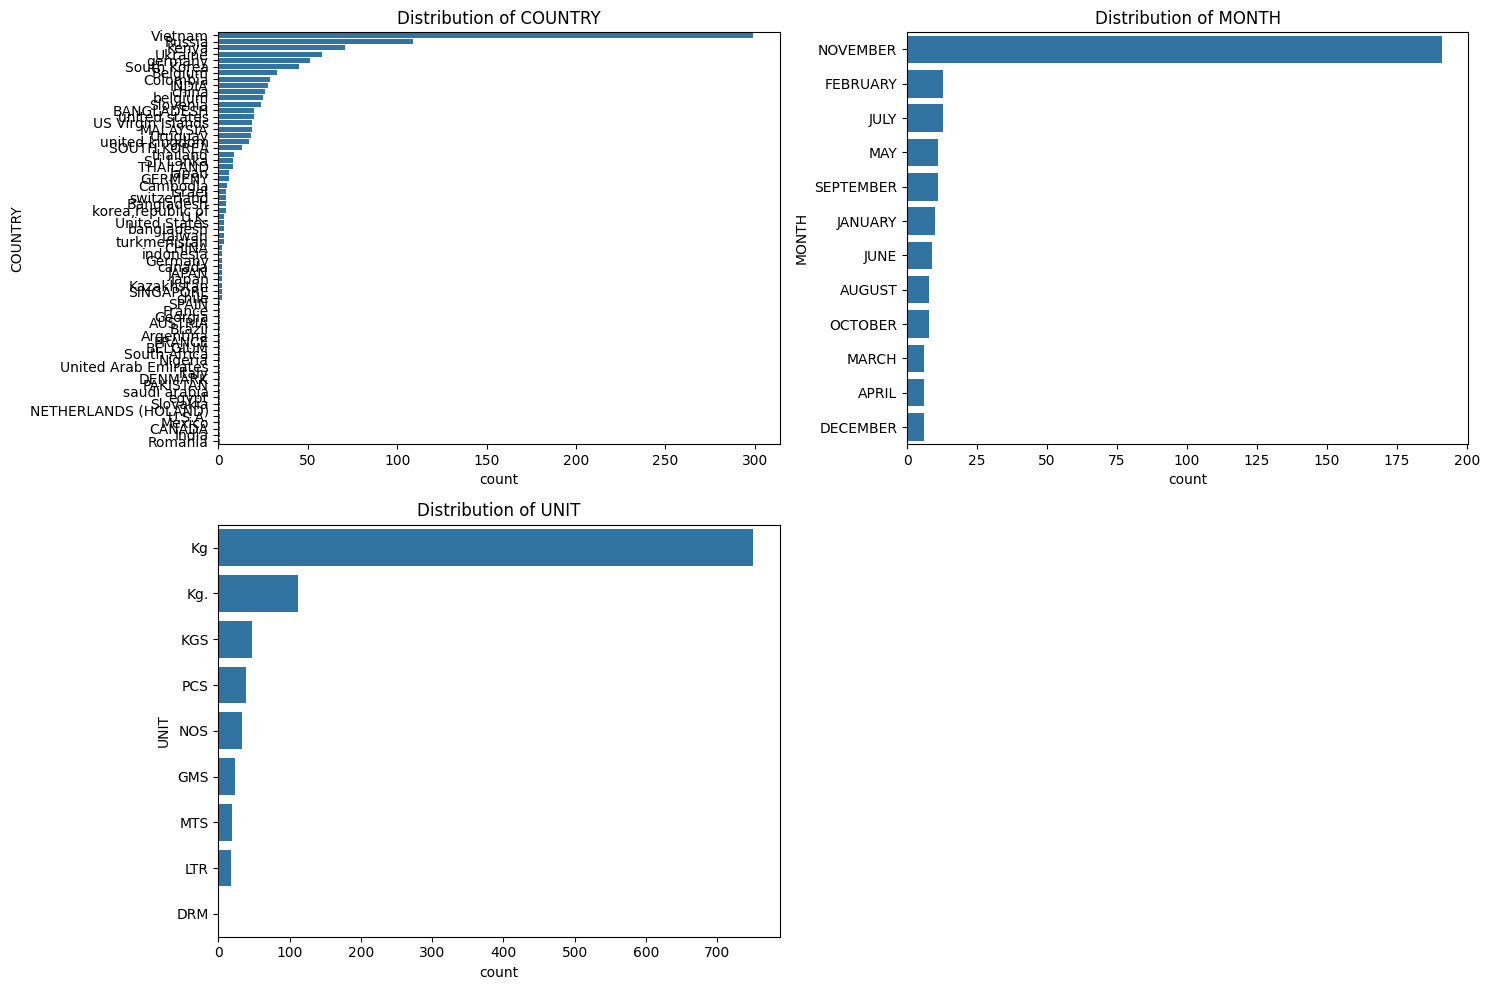

In [127]:
#Analyzing the cetagorical varibles
# Bar plots for categorical columns
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(y=df['COUNTRY'], order=df['COUNTRY'].value_counts().index)
plt.title('Distribution of COUNTRY')

plt.subplot(2, 2, 2)
sns.countplot(y=df['MONTH'], order=df['MONTH'].value_counts().index)
plt.title('Distribution of MONTH')

plt.subplot(2, 2, 3)
sns.countplot(y=df['UNIT'], order=df['UNIT'].value_counts().index)
plt.title('Distribution of UNIT')

plt.tight_layout()
plt.show()

In [128]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_cols:
    unique_values = df[col].unique()
    value_counts = df[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    1042
Name: count, dtype: int64
 
MONTH
NOVEMBER     191
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
HSCODE
28070010      85
2847000000    84
28080000      67
3102401000    58
28291100      54
              ..
2801200032     1
2801200031     1
2801200030     1
2801200029     1
2812101100     1
Name: count, Length: 131, dtype: int64
 
COUNTRY
Vietnam    299
Russia     109
Kenya       71
Ukraine     58
germany     51
          ... 
U.S.A.       1
Mexico       1
CANADA       1
India        1
Romania      1
Name: count, Length: 66, dtype: int64
 
UNIT
Kg     750
Kg.    112
KGS     47
PCS     39
NOS     33
GMS     23
MTS     19
LTR     18
DRM      1
Name: count, dtype: int64
 
DESCRIPTION_01
Inorganic chemicals; Organic or inorganic comp

## Missing value --------------------------------

In [129]:
# Displaying the categorical columns which contains null values and their counts
print("Categorical columns with null values and their counts:")
for col in categorical_cols:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Categorical columns with null values and their counts:
MONTH: 750
COUNTRY: 4


In [130]:
# Displaying the categorical columns which contain 'Unknown' values and their relevant counts
print("Categorical columns with 'Unknown' values and their counts:")
for col in categorical_cols:
    unknown_count = (df[col] == 'Unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count}")

Categorical columns with 'Unknown' values and their counts:
IMPORTER: 1042


In [131]:
# List of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Displaying the numerical features
print("Numerical Features:")
for feature in numerical_cols:
    print(f"- {feature}")

# Display the data type of the numerical features
print("\nData Type of Numerical Features:")
print(df[numerical_cols].dtypes)

Numerical Features:
- YEAR
- QUANTITY
- VALUE_RS

Data Type of Numerical Features:
YEAR        float64
QUANTITY    float64
VALUE_RS    float64
dtype: object


In [132]:
# Displaying the unique values and their count in the numerical columns
print("Unique values and their count in the numerical columns:\n")
for col in numerical_cols:
    unique_values = df[col].unique()
    value_counts = df[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count in the numerical columns:

YEAR
2016.0    180
2023.0    112
Name: count, dtype: int64
 
QUANTITY
1000.0     55
1.0        49
16200.0    40
5.0        31
27.0       28
           ..
204.0       1
23200.0     1
22820.0     1
22560.0     1
19050.0     1
Name: count, Length: 359, dtype: int64
 
VALUE_RS
0.40           4
53.79          3
188.55         3
0.20           3
21.15          2
              ..
350598.00      1
2213950.00     1
10318355.00    1
24988179.00    1
0.68           1
Name: count, Length: 263, dtype: int64
 


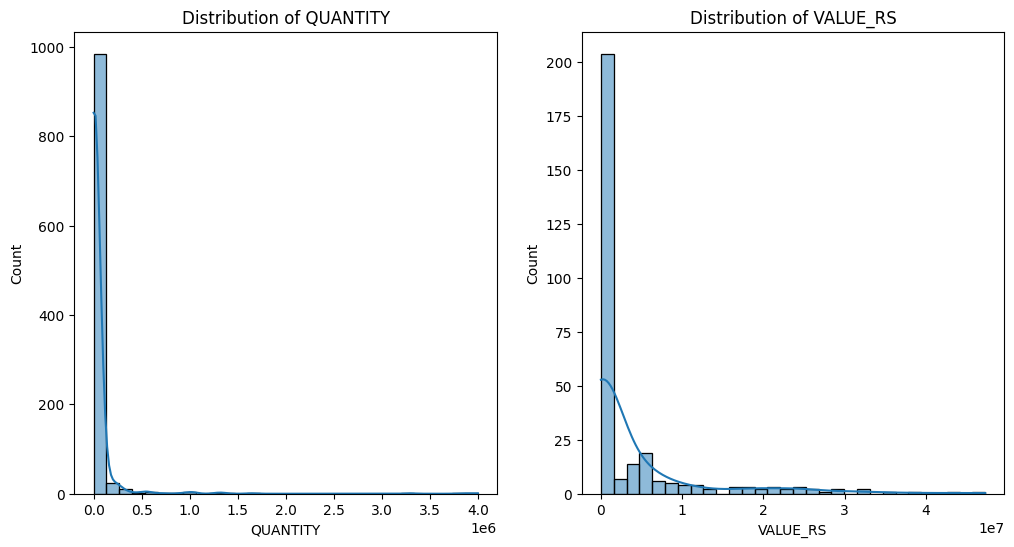

In [133]:
# checking data disstrubition
# Plot histograms for numerical columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['QUANTITY'], kde=True, bins=30)
plt.title('Distribution of QUANTITY')

plt.subplot(1, 2, 2)
sns.histplot(df['VALUE_RS'], kde=True, bins=30)
plt.title('Distribution of VALUE_RS')

plt.show()

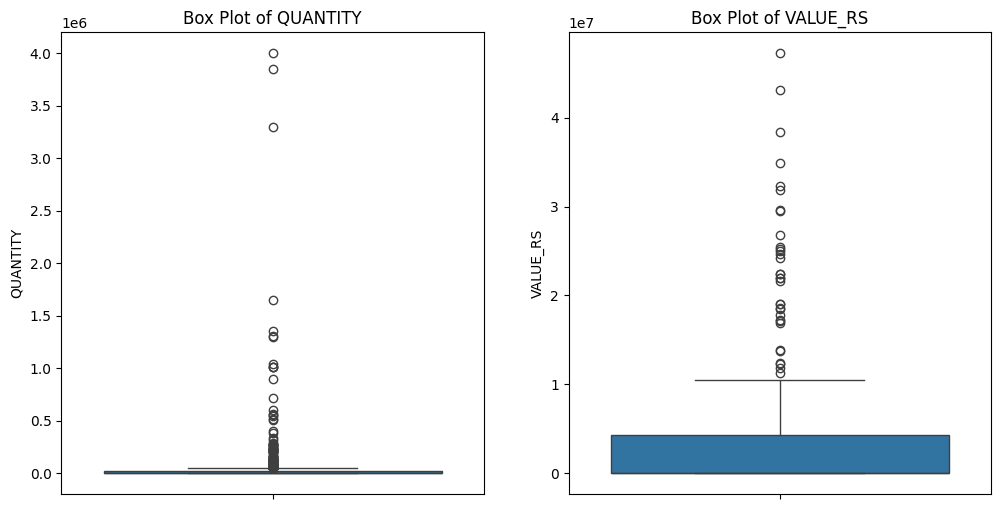

In [134]:
# checking for Outliers
# Box plots for numerical columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['QUANTITY'])
plt.title('Box Plot of QUANTITY')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['VALUE_RS'])
plt.title('Box Plot of VALUE_RS')

plt.show()

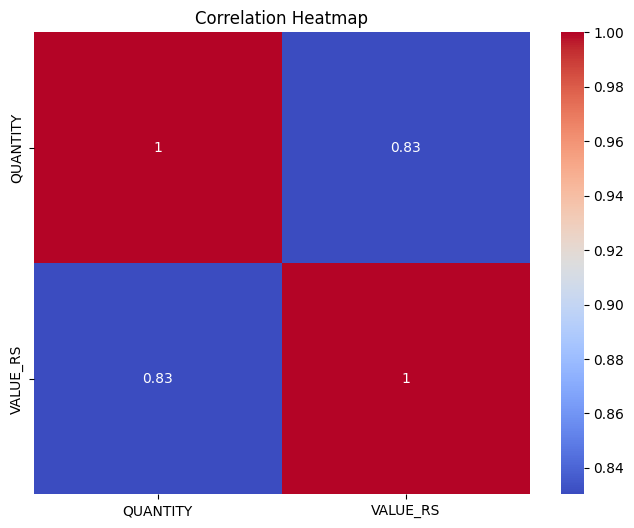

In [135]:
#Check Correlation Between Variables
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['QUANTITY', 'VALUE_RS']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [136]:
# Displaying the numerical columns with null values and their relevant counts
print("Numerical columns with null values and their relevant counts:")
for col in numerical_cols:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Numerical columns with null values and their relevant counts:
YEAR: 750
QUANTITY: 3
VALUE_RS: 750


## Data preprocesssing


In [137]:
# Removing whitespaces from the object type columns
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].apply(lambda x: x.str.strip())

In [138]:
# Removing unnecessary full stops(".") from the categorical columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.replace('.', ''))

In [139]:
# Step 3: Removing unnecessary special characters and trailing spaces from the 'DESCRIPTION_03' column
# Removing the leading hyphen
df['DESCRIPTION_03'] = df['DESCRIPTION_03'].str.lstrip('-')

# Removing trailing spaces
df['DESCRIPTION_03'] = df['DESCRIPTION_03'].str.strip()

In [140]:
# Converting all the values in the 'COUNTRY' and the 'UNIT' columns to uppercase values
df['COUNTRY'] = df['COUNTRY'].str.upper()
df['UNIT'] = df['UNIT'].str.upper()

# Displaying the modified dataset
print(df)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY      280110   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY      280110        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY      280110     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY      280110   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY      280110        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [141]:
# Removing trailing spaces for the entire 'DESCRIPTION_02' column
df['DESCRIPTION_02'] = df['DESCRIPTION_02'].str.strip()

In [142]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_cols:
    unique_values = df[col].unique()
    value_counts = df[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    1042
Name: count, dtype: int64
 
MONTH
NOVEMBER     191
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
HSCODE
28070010      85
2847000000    84
28080000      67
3102401000    58
28291100      54
              ..
2801200032     1
2801200031     1
2801200030     1
2801200029     1
2812101100     1
Name: count, Length: 131, dtype: int64
 
COUNTRY
VIETNAM                 299
RUSSIA                  109
KENYA                    71
BELGIUM                  59
SOUTH KOREA              58
UKRAINE                  58
GERMANY                  53
COLOMBIA                 29
INDIA                    29
CHINA                    28
BANGLADESH               27
SLOVENIA                 24
UNITED STATES            23
MALAYSIA                 19
US VIR

In [143]:
# Converting all the values in the 'COUNTRY' and the 'UNIT' columns to uppercase values
df['COUNTRY'] = df['COUNTRY'].str.upper()
df['UNIT'] = df['UNIT'].str.upper()

# Displaying the modified dataset
print(df)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY      280110   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY      280110        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY      280110     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY      280110   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY      280110        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [144]:
# Step 7: Handling the HSCODES

# Checking the length of the HSCODES and determining the maximum length
df['HSCODE_LENGTH'] = df['HSCODE'].apply(len)
max_length = df['HSCODE_LENGTH'].max()

# Padding HSCODE values with trailing zeros to match the maximum length
df['HSCODE'] = df['HSCODE'].apply(lambda x: x.ljust(max_length, '0'))

# Dropping the helper column 'HSCODE_LENGTH' as it's no longer needed
df.drop(columns=['HSCODE_LENGTH'], inplace=True)

# Displaying the modified dataset
print(df)


     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY  2801100000   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY  2801100000        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY  2801100000     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY  2801100000   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY  2801100000        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [145]:
# Step 8: Handling the 'COUNTRY' Column

# Replacing specific country names
df['COUNTRY'] = df['COUNTRY'].replace({
    'United States': 'USA',
    'United States of America': 'USA',
    'United Kingdom': 'UK',
    'Korea, Republic of': 'South Korea'
})

print(df)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY  2801100000   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY  2801100000        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY  2801100000     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY  2801100000   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY  2801100000        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [146]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_cols:
    unique_values = df[col].unique()
    value_counts = df[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    1042
Name: count, dtype: int64
 
MONTH
NOVEMBER     191
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
HSCODE
2847000000    145
2808000000    136
2807001000     85
3102401000     58
2829110000     54
             ... 
2801200029      1
2801200028      1
2801200027      1
2801200026      1
2812101100      1
Name: count, Length: 117, dtype: int64
 
COUNTRY
VIETNAM                 299
RUSSIA                  109
KENYA                    71
BELGIUM                  59
SOUTH KOREA              58
UKRAINE                  58
GERMANY                  53
COLOMBIA                 29
INDIA                    29
CHINA                    28
BANGLADESH               27
SLOVENIA                 24
UNITED STATES            23
MALAYSIA               

## Handling Missing Values

In [147]:
#  Handling missing values in the categorical columns

# Replacing all the missing values in the categorical columns with 'Unknown' for imputation
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [148]:
# Verifying the changes after replacing the missing values with 'Unknown'
print("Checking for any missing values left behind after replacing with 'Unknown':")
for col in categorical_cols:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count} missing values")
    else:
        print(f"{col}: No missing values")
    print(" ")

Checking for any missing values left behind after replacing with 'Unknown':
IMPORTER: No missing values
 
MONTH: No missing values
 
HSCODE: No missing values
 
COUNTRY: No missing values
 
UNIT: No missing values
 
DESCRIPTION_01: No missing values
 
DESCRIPTION_02: No missing values
 
DESCRIPTION_03: No missing values
 


In [149]:
# Handling the 'Unknown' values in the 'COUNTRY' column using the mode
mode_country = df['COUNTRY'].mode()[0]
df['COUNTRY'] = df['COUNTRY'].replace('Unknown', mode_country)

In [150]:
# Dropping the 'MONTH' and 'IMPORTERS' Columns due to the significant amount of null values
df.drop(columns=['MONTH', 'IMPORTER'], inplace=True)

In [151]:
# Displaying dataset information
print("\nDataset information after categorical imputation:")
df.info()


Dataset information after categorical imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            292 non-null    float64
 1   HSCODE          1042 non-null   object 
 2   COUNTRY         1042 non-null   object 
 3   UNIT            1042 non-null   object 
 4   QUANTITY        1039 non-null   float64
 5   VALUE_RS        292 non-null    float64
 6   DESCRIPTION_01  1042 non-null   object 
 7   DESCRIPTION_02  1042 non-null   object 
 8   DESCRIPTION_03  1042 non-null   object 
dtypes: float64(3), object(6)
memory usage: 73.4+ KB


In [152]:
# Display unique values in the 'COUNTRY' column
unique_countries = df['COUNTRY'].unique()
print("Unique Countries:")
print(unique_countries)

Unique Countries:
['BANGLADESH' 'INDIA' 'MALAYSIA' 'AUSTRIA' 'CHINA' 'USA' 'SOUTH KOREA'
 'THAILAND' 'GERMENY' 'CANADA' 'DENMARK' 'UK' 'JAPAN' 'PAKISTAN'
 'NETHERLANDS (HOLAND)' 'BELGIUM' 'SINGAPORE' 'SPAIN' 'FRANCE' 'GERMANY'
 'ISRAEL' 'CHILE' 'SWITZERLAND' 'UNITED STATES' 'TURKMENISTAN'
 'KOREA,REPUBLIC OF' 'UNITED KINGDOM' 'TAIWAN' 'RUSSIA' 'VIETNAM'
 'US VIRGIN ISLANDS' 'KENYA' 'UKRAINE' 'URUGUAY' 'COLOMBIA' 'INDONESIA'
 'KAZAKHSTAN' 'CAMBODIA' 'MEXICO' 'SLOVENIA' 'ROMANIA' 'SLOVAKIA' 'EGYPT'
 'SAUDI ARABIA' 'ITALY' 'UNITED ARAB EMIRATES' 'NIGERIA' 'SOUTH AFRICA'
 'SRI LANKA' 'ARGENTINA' 'BRAZIL' 'GEORGIA']


In [153]:
# Display unique values in the 'HSCODE' column
unique_hscodes = df['HSCODE'].unique()
print("Unique HSCodes:")
print(unique_hscodes)

Unique HSCodes:
['2801100000' '2808000000' '2837110000' '2837190000' '2847000000'
 '2808001000' '2801200000' '2801302000' '2837209000' '2837191000'
 '2837202000' '2837199000' '2801200001' '2801200002' '2801200003'
 '2801200004' '2801200005' '2801200006' '2801200007' '2801200008'
 '2801200009' '2801200010' '2801200011' '2801200012' '2801200013'
 '2801200014' '2801200015' '2801200016' '2801200017' '2801200018'
 '2801200019' '2801200020' '2801200021' '2801200022' '2801200023'
 '2801200024' '2801200025' '2801200026' '2801200027' '2801200028'
 '2801200029' '2801200030' '2801200031' '2801200032' '2801200033'
 '2801200034' '2801200035' '2801200036' '2801200037' '2801200038'
 '2801200039' '2801200040' '2801200041' '2801200042' '2801200043'
 '2801200044' '2801200045' '2801200046' '2801200047' '2801200048'
 '2801200049' '2801200050' '2801200051' '2801200052' '2801200053'
 '2801200054' '2801200055' '2801200056' '2801200057' '2801200058'
 '2801200059' '2801200060' '2801200061' '2801200062' '280120

In [154]:
# Display the unique values in the 'UNIT' column
unique_units = df['UNIT'].unique()
print("Unique Units:")
print(unique_units)

Unique Units:
['KG' 'LTR' 'PCS' 'KGS' 'NOS' 'GMS' 'MTS' 'DRM']


In [155]:
# Displaying the unique values in the 'DESCRIPTION_01' column
unique_descriptions_01 = df['DESCRIPTION_01'].unique()
print("Unique Descriptions_01:")
print(unique_descriptions_01)

Unique Descriptions_01:
['Inorganic chemicals; Organic or inorganic compounds of precious metals, of rare earth metals, of radioactive elements or of isotopes'
 'Fertilizers']


In [156]:
# Displaying the unique values in the 'DESCRIPTION_02' column
unique_descriptions_02 = df['DESCRIPTION_02'].unique()
print("Unique Descriptions_02:")
print(unique_descriptions_02)

Unique Descriptions_02:
['Fluorine, chlorine, bromine and iodine'
 'Nitric acid; sulphonitric acids'
 'Cyanides, cyanide oxides and complex cyanides'
 'Hydrogen peroxide, whether or not solidified with urea'
 'Chlorates and perchlorates; bromates and perbromates; iodates and periodates'
 'Mineral or chemical fertilizers, nitrogenous' 'Sulphuric acid; oleum'
 'Halides and halide oxides of non metals'
 'Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts']


In [157]:

# Displaying the unique values in the 'DESCRIPTION_03' column
unique_descriptions_03 = df['DESCRIPTION_03'].unique()
print("Unique Descriptions_03:")
print(unique_descriptions_03)

Unique Descriptions_03:
['Chlorine' 'Nitric acid; sulphonitric acids'
 'Cyanides and cyanide oxides : Of sodium'
 'Cyanides and cyanide oxides : Other'
 'Hydrogen peroxide, whether or not solidified with urea' 'Iodine'
 'Bromine'
 'Chlorates and perchlorates; bromates and perbromates; iodates and periodates'
 'Mineral or chemical fertilizers, nitrogenous' 'Sulphuric acid; oleum'
 'Halides and halide oxides of non metals'
 'Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts']


# Data Encoding

In [158]:

# Step 11: Encoding the Categorical Columns
encoding_columns = ['HSCODE', 'COUNTRY', 'UNIT', 'DESCRIPTION_01', 'DESCRIPTION_02', 'DESCRIPTION_03']

# Loop through the columns to apply One-Hot Encoding
for col in encoding_columns:
    one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded = one_hot_encoder.fit_transform(df[[col]])
    encoded_df = pd.DataFrame(encoded, columns=[f'{col}_{category}' for category in one_hot_encoder.categories_[0]])  # Convert to DataFrame
    df = pd.concat([df, encoded_df], axis=1)  # Concatenate the encoded DataFrame
    df.drop(columns=[col], inplace=True)  # Drop the original categorical column
    print(f"One-Hot Encoding applied to column: {col}")

print("All categorical columns encoded successfully.")


One-Hot Encoding applied to column: HSCODE
One-Hot Encoding applied to column: COUNTRY
One-Hot Encoding applied to column: UNIT
One-Hot Encoding applied to column: DESCRIPTION_01
One-Hot Encoding applied to column: DESCRIPTION_02
One-Hot Encoding applied to column: DESCRIPTION_03
All categorical columns encoded successfully.


In [159]:
df.head()

,YEAR,QUANTITY,VALUE_RS,HSCODE_2801100000,HSCODE_2801200000,HSCODE_2801200001,HSCODE_2801200002,HSCODE_2801200003,HSCODE_2801200004,HSCODE_2801200005,...,DESCRIPTION_03_Chlorine,DESCRIPTION_03_Cyanides and cyanide oxides : Of sodium,DESCRIPTION_03_Cyanides and cyanide oxides : Other,"DESCRIPTION_03_Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts",DESCRIPTION_03_Halides and halide oxides of non metals,"DESCRIPTION_03_Hydrogen peroxide, whether or not solidified with urea",DESCRIPTION_03_Iodine,"DESCRIPTION_03_Mineral or chemical fertilizers, nitrogenous",DESCRIPTION_03_Nitric acid; sulphonitric acids,DESCRIPTION_03_Sulphuric acid; oleum
0,2023.0,131600.0,13877114.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023.0,37800.0,3924989.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023.0,12090.0,5390772.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023.0,25200.0,3089445.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023.0,75599.0,6939860.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Handling missing values in the numerical columns

In [160]:
# Handling missing values in the numerical columns

# KNN Imputation for 'QUANTITY'
knn_imputer = KNNImputer(n_neighbors=5)
df[['QUANTITY']] = knn_imputer.fit_transform(df[['QUANTITY']])

In [161]:
#  Dropping the 'YEAR' n the 'VALUE_RS' Column
df.drop(columns=['YEAR', 'VALUE_RS'], inplace=True)

In [162]:
#displaying the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Columns: 201 entries, QUANTITY to DESCRIPTION_03_Sulphuric acid; oleum
dtypes: float64(201)
memory usage: 1.6 MB


In [163]:
df.head()


,QUANTITY,HSCODE_2801100000,HSCODE_2801200000,HSCODE_2801200001,HSCODE_2801200002,HSCODE_2801200003,HSCODE_2801200004,HSCODE_2801200005,HSCODE_2801200006,HSCODE_2801200007,...,DESCRIPTION_03_Chlorine,DESCRIPTION_03_Cyanides and cyanide oxides : Of sodium,DESCRIPTION_03_Cyanides and cyanide oxides : Other,"DESCRIPTION_03_Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts",DESCRIPTION_03_Halides and halide oxides of non metals,"DESCRIPTION_03_Hydrogen peroxide, whether or not solidified with urea",DESCRIPTION_03_Iodine,"DESCRIPTION_03_Mineral or chemical fertilizers, nitrogenous",DESCRIPTION_03_Nitric acid; sulphonitric acids,DESCRIPTION_03_Sulphuric acid; oleum
0,131600.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12090.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75599.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Handling the Outliers

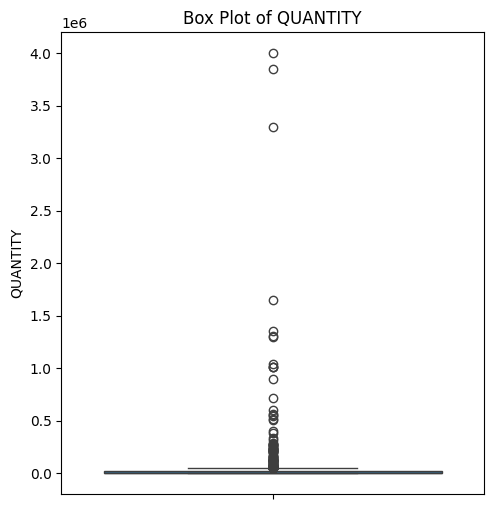

In [164]:
# checking for Outliers
# Box plots for numerical columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['QUANTITY'])
plt.title('Box Plot of QUANTITY')

plt.show()


In [165]:
# Handling the outliers in the numerical columns

# Assigning the Numerical Columns for the outlier analysis
outlier_columns = ["QUANTITY"]

# Creating an empty dictionary to store the outliers
outlier_info = {}

for column in outlier_columns:
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detecting outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    outlier_info[column] = {
        'Outliers': len(outliers),
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

    print(f"Column: {column}")
    print(f"  Outliers: {outlier_info[column]['Outliers']}, Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f}")
    print(" ")


Column: QUANTITY
  Outliers: 98, Lower: -29912.50, Upper: 49947.50
 


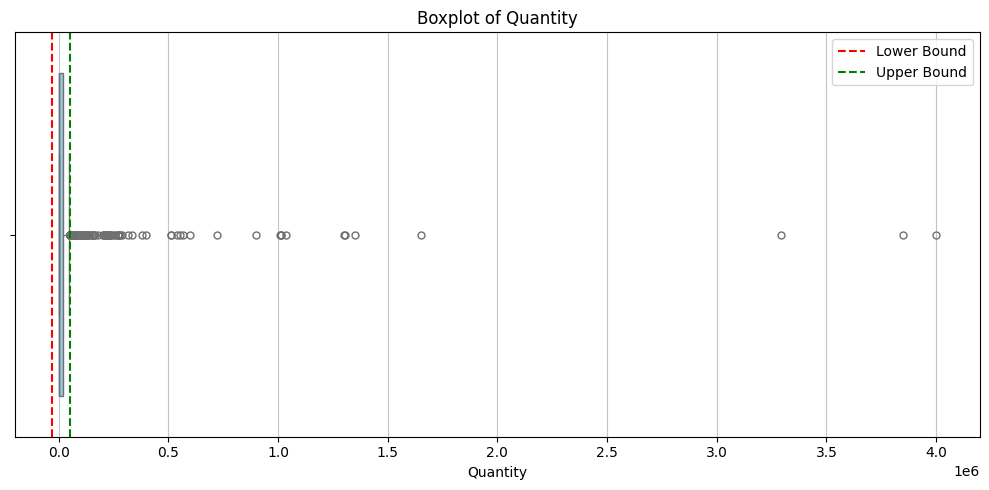

In [166]:
# Visualizing the outliers for Quantity
plt.figure(figsize=(10, 5))
Q1 = df['QUANTITY'].quantile(0.25)
Q3 = df['QUANTITY'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sns.boxplot(x=df['QUANTITY'], color='skyblue', flierprops=dict(marker='o', color='red', markersize=5))
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.legend()
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

In [167]:
# Function to handle outliers by capping
def handle_outliers(df, method='cap'):
    for column in df.columns:
      if column == 'QUANTITY':
            lower_bound, upper_bound = -0.31, 0.03
            df[column] = df[column].apply(lambda x: min(max(x, lower_bound), upper_bound) if method == 'cap' else x)

    return df


# Applying the function to handle outliers
df = handle_outliers(df.copy(), method='cap')

# Displaying the cleaned dataset
print(df.head())

   QUANTITY  HSCODE_2801100000  HSCODE_2801200000  HSCODE_2801200001  \
0      0.03                1.0                0.0                0.0   
1      0.03                1.0                0.0                0.0   
2      0.03                1.0                0.0                0.0   
3      0.03                1.0                0.0                0.0   
4      0.03                1.0                0.0                0.0   

   HSCODE_2801200002  HSCODE_2801200003  HSCODE_2801200004  HSCODE_2801200005  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   HSCODE_2801200006  HSCODE_2801200007  ...  DESCRIPTION_03_Chlorine  \
0      

# Applying K-mean clustering

In [170]:
# Clustering using K-means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)
print("Clustering completed successfully.")

Clustering completed successfully.


In [171]:
# Step 20: Assign Risk Categories
risk_map = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}
df['RISK'] = df['Cluster'].map(risk_map)


In [173]:
# Dropping the Cluster Column
df.drop('Cluster', axis=1, inplace=True)

In [175]:
# Display Dataset Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Columns: 202 entries, QUANTITY to RISK
dtypes: float64(201), object(1)
memory usage: 1.6+ MB
None


In [178]:
df.head()

,QUANTITY,HSCODE_2801100000,HSCODE_2801200000,HSCODE_2801200001,HSCODE_2801200002,HSCODE_2801200003,HSCODE_2801200004,HSCODE_2801200005,HSCODE_2801200006,HSCODE_2801200007,...,DESCRIPTION_03_Cyanides and cyanide oxides : Of sodium,DESCRIPTION_03_Cyanides and cyanide oxides : Other,"DESCRIPTION_03_Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts",DESCRIPTION_03_Halides and halide oxides of non metals,"DESCRIPTION_03_Hydrogen peroxide, whether or not solidified with urea",DESCRIPTION_03_Iodine,"DESCRIPTION_03_Mineral or chemical fertilizers, nitrogenous",DESCRIPTION_03_Nitric acid; sulphonitric acids,DESCRIPTION_03_Sulphuric acid; oleum,RISK
0,0.03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium Risk
1,0.03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium Risk
2,0.03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium Risk
3,0.03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium Risk
4,0.03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium Risk


In [179]:
# Print Unique Values for All Columns
for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print('-' * 40)

Unique values in 'QUANTITY':
[0.03 0.  ]
----------------------------------------
Unique values in 'HSCODE_2801100000':
[1. 0.]
----------------------------------------
Unique values in 'HSCODE_2801200000':
[0. 1.]
----------------------------------------
Unique values in 'HSCODE_2801200001':
[0. 1.]
----------------------------------------
Unique values in 'HSCODE_2801200002':
[0. 1.]
----------------------------------------
Unique values in 'HSCODE_2801200003':
[0. 1.]
----------------------------------------
Unique values in 'HSCODE_2801200004':
[0. 1.]
----------------------------------------
Unique values in 'HSCODE_2801200005':
[0. 1.]
----------------------------------------
Unique values in 'HSCODE_2801200006':
[0. 1.]
----------------------------------------
Unique values in 'HSCODE_2801200007':
[0. 1.]
----------------------------------------
Unique values in 'HSCODE_2801200008':
[0. 1.]
----------------------------------------
Unique values in 'HSCODE_2801200009':
[0. 1.]
--

In [182]:
# Encode Target Variable (Risk)
target_encoder = LabelEncoder()
df['RISK'] = target_encoder.fit_transform(df['RISK'])

# Print Encoded Values
print("Original Risk Categories:")
print(df['RISK'].unique())
print("\nEncoded Risk Categories:")
print(df['RISK'].unique())

Original Risk Categories:
[2 0 1]

Encoded Risk Categories:
[2 0 1]


<ipython-input-187-bbb5862c26cf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RISK', data=df, palette='viridis')


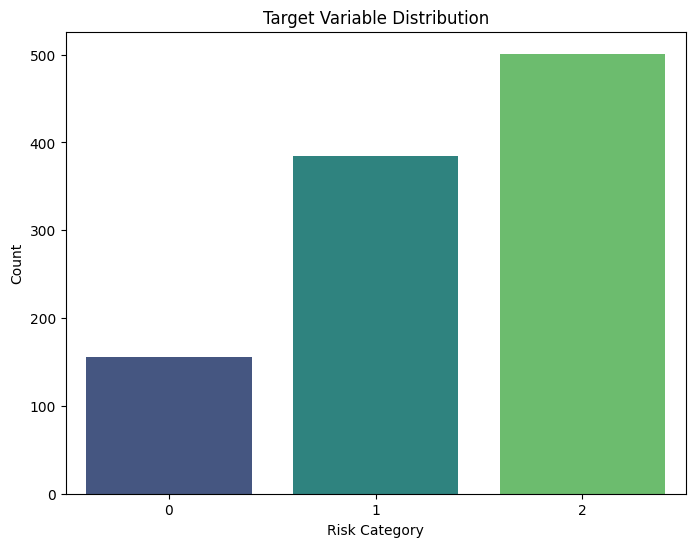

In [187]:

# Set Style
plt.figure(figsize=(8, 6))
sns.countplot(x='RISK', data=df, palette='viridis')
plt.title('Target Variable Distribution')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.show()

In [189]:
# Count the occurrences of each risk category
risk_counts = df['RISK'].value_counts()

# Print the counts for each risk category
print("Risk Category Counts:")
print(risk_counts)


Risk Category Counts:
RISK
2    501
1    385
0    156
Name: count, dtype: int64


In [191]:
# Features (X) and Target (y)
X = df.drop(['RISK'], axis=1)
y = df['RISK']


In [199]:

# Splitting dataset into training and testing before SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training Set Size:", X_train.shape[0])
print("Testing Set Size:", X_test.shape[0])

Training Set Size: 833
Testing Set Size: 209
